In [1]:
## Load packages
from costs_benefits_ssp.cb_calculate import CostBenefits
import pandas as pd
from costs_benefits_ssp.model.cb_data_model import TXTable,CostFactor,TransformationCost,StrategyInteraction
import polars as pl
import os

In [2]:
##---- Define Directories ----##
SCRIPT_DIR_PATH = os.getcwd()
PARENT_DIR_PATH = os.path.dirname(SCRIPT_DIR_PATH)
OUTPUT_CB_PATH = os.path.join(SCRIPT_DIR_PATH, "output")
CONFIG_DIR_PATH = os.path.join(SCRIPT_DIR_PATH, "cb_config_files")
RUN_OUTPUT_DIR_PATH = os.path.join(PARENT_DIR_PATH, "ssp_run_output")
RUN_ID = "2025-09-30T16;13;13.113881"
RUN_DIR_PATH = os.path.join(RUN_OUTPUT_DIR_PATH, "sisepuede_results_sisepuede_run_2025-09-30T16;13;13.113881")


In [3]:
# Make sure output directory exists
os.makedirs(OUTPUT_CB_PATH, exist_ok=True)

In [4]:
## Load the data
ssp_data = pd.read_csv(os.path.join(RUN_DIR_PATH, 
                                    "decomposed_ssp_output.csv"))
att_primary = pd.read_csv(os.path.join(RUN_DIR_PATH, "ATTRIBUTE_PRIMARY.csv"))
att_strategy = pd.read_csv(os.path.join(RUN_DIR_PATH, "ATTRIBUTE_STRATEGY.csv"))
print(f"Loaded ssp_data with {ssp_data.shape[0]} rows and {ssp_data.shape[1]} columns")
print(f"Loaded att_primary with {att_primary.shape[0]} rows and {att_primary.shape[1]} columns")
print(f"Loaded att_strategy with {att_strategy.shape[0]} rows and {att_strategy.shape[1]} columns")

Loaded ssp_data with 58 rows and 4054 columns
Loaded att_primary with 2 rows and 4 columns
Loaded att_strategy with 73 rows and 6 columns


In [5]:
att_strategy.head()

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0


In [6]:
att_strategy.tail()

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
68,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
69,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
70,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0
71,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
72,6003,PFLO:LEP,LEP,LEP,TX:IPPU:DEC_OTHER_FCS_STRATEGY_LEP|TX:ENTC:TAR...,0


In [7]:
## Define base strategy
strategy_code_base = "BASE"

In [8]:
# Check if strategy_code_base exists in att_strategy
if strategy_code_base not in att_strategy['strategy_code'].values:
    raise ValueError(f"Base strategy code '{strategy_code_base}' not found in att_strategy.")

In [9]:
## Instantiate an object of the CostBenefits class
cb = CostBenefits(ssp_data, att_primary, att_strategy, strategy_code_base)

The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode
The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode


In [10]:
# Once the excel file has been updated, we can reload it to update the cost factors database
cb.load_cb_parameters(os.path.join(CONFIG_DIR_PATH, "cb_config_params.xlsx"))

Cargamos configuración de archivo excel
Se actualizó la base de datos


In [11]:
# Compute System Costs
results_system = cb.compute_system_cost_for_all_strategies(verbose=False)


************************************
*Strategy : PFLO:LEP (0/1)
************************************



In [12]:
# Compute Technical Costs
results_tx = cb.compute_technical_cost_for_all_strategies(verbose=False)


************************************
*Strategy : PFLO:LEP (0/1)
************************************

La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Co

/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:856: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_variable"] = cb_orm.diff_var
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:857: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_value"] = data_merged["difference"]
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:858: Setti

La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost


In [13]:
# Combine results
results_all = pd.concat([results_system, results_tx], ignore_index = True)

In [14]:
#-------------POST PROCESS SIMULATION RESULTS---------------
# Post process interactions among strategies that affect the same variables
results_all_pp = cb.cb_process_interactions(results_all)

# SHIFT any stray costs incurred from 2015 to 2025 to 2025 and 2035
results_all_pp_shifted = cb.cb_shift_costs(results_all_pp)


Resolving Interactions in SCOE : TX:SCOE:INC_EFFICIENCY_APPLIANCE, TX:SCOE:SHIFT_FUEL_HEAT, TX:SCOE:SHIFT_FUEL_HEAT, TX:SCOE:DEC_DEMAND_HEAT 
Resolving Interactions in INEN : TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:INC_EFFICIENCY_ENERGY 


/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pre2025["variable"] = res_pre2025["variable"] + "_shifted" + (res_pre2025["time_period"]+SSP_GLOBAL_TIME_PERIOD_0).astype(str)#create a new variable so they can be recognized as shifted costs
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pre2025[

In [15]:
results_all_pp_shifted

,strategy_code,future_id,region,time_period,difference_variable,variable_value_baseline,variable_value_pathway,difference_value,variable,value
0,PFLO:LEP,0.0,morocco,7.0,pop_unimproved_rural,299091.209054,299091.209054,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
1,PFLO:LEP,0.0,morocco,8.0,pop_unimproved_rural,294340.078493,294340.078493,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
2,PFLO:LEP,0.0,morocco,9.0,pop_unimproved_rural,289474.711388,289474.711388,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
3,PFLO:LEP,0.0,morocco,10.0,pop_unimproved_rural,284494.629299,284494.629299,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000e+00
4,PFLO:LEP,0.0,morocco,11.0,pop_unimproved_rural,279403.968085,279403.968085,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
7419,PFLO:LEP,0.0,morocco,18.0,energy_consumption_inen_total,86.547248,86.547248,2.744790e-12,cb:inen:technical_savings:fuel_switch:all_shif...,-2.289154e-07
7420,PFLO:LEP,0.0,morocco,19.0,energy_consumption_inen_total,88.329186,88.329186,3.200086e-12,cb:inen:technical_savings:fuel_switch:all_shif...,-2.668872e-07
7421,PFLO:LEP,0.0,morocco,17.0,energy_consumption_inen_total,103.285302,103.285302,2.697315e-12,cb:inen:technical_cost:efficiency:X_shifted2022.0,2.697315e-05
7422,PFLO:LEP,0.0,morocco,18.0,energy_consumption_inen_total,102.546364,102.546364,3.252191e-12,cb:inen:technical_cost:efficiency:X_shifted2023.0,3.252191e-05


In [16]:
results_all_pp_shifted.strategy_code.unique()

array(['PFLO:LEP'], dtype=object)

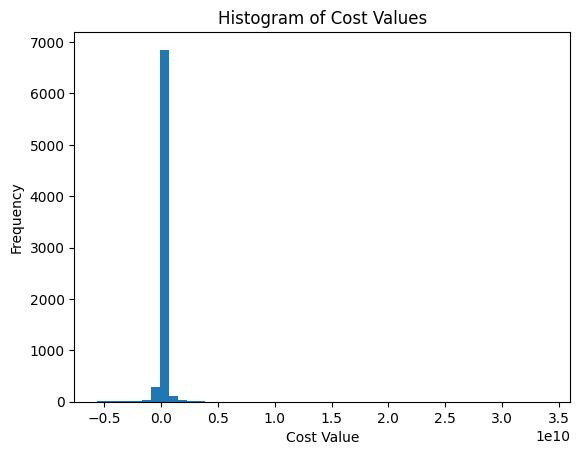

In [17]:
import matplotlib.pyplot as plt
plt.hist(results_all_pp_shifted.value, bins=50)
plt.title('Histogram of Cost Values')
plt.xlabel('Cost Value')
plt.ylabel('Frequency')
plt.show()

## Check for NaNs and Infs and DF Cleaning

In [18]:
# check nans
results_all_pp_shifted.value.isna().any()

np.False_

In [19]:
# check -inf or inf values
results_all_pp_shifted.value.isin([float('inf'), float('-inf')]).any()

np.False_

## Reshape to load into tableau

In [20]:
# --- Read cost-benefit data ---
cb_data = results_all_pp_shifted.copy()

# Split 'variable' into components: name, sector, cb_type, item_1, item_2
# (Assumes exactly 5 colon-separated parts; if there are more colons inside the last field,
# they will be kept in item_2 thanks to n=4)
cb_chars = cb_data["variable"].astype(str).str.split(":", n=4, expand=True)
cb_chars.columns = ["name", "sector", "cb_type", "item_1", "item_2"]
cb_data = pd.concat([cb_data, cb_chars], axis=1)

In [21]:
cb_data.head()

,strategy_code,future_id,region,time_period,difference_variable,variable_value_baseline,variable_value_pathway,difference_value,variable,value,name,sector,cb_type,item_1,item_2
0,PFLO:LEP,0.0,morocco,7.0,pop_unimproved_rural,299091.209054,299091.209054,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural
1,PFLO:LEP,0.0,morocco,8.0,pop_unimproved_rural,294340.078493,294340.078493,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural
2,PFLO:LEP,0.0,morocco,9.0,pop_unimproved_rural,289474.711388,289474.711388,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural
3,PFLO:LEP,0.0,morocco,10.0,pop_unimproved_rural,284494.629299,284494.629299,0.0,cb:wali:technical_cost:sanitation:unimp_rural,-0.0,cb,wali,technical_cost,sanitation,unimp_rural
4,PFLO:LEP,0.0,morocco,11.0,pop_unimproved_rural,279403.968085,279403.968085,0.0,cb:wali:technical_cost:sanitation:unimp_rural,-0.0,cb,wali,technical_cost,sanitation,unimp_rural


In [22]:
# Scale value from USD to billions (divide by 1e9)
if "value" in cb_data.columns:
    cb_data["value"] = cb_data["value"] / 1e9

# --- Remove "shifted" entries ---
# Remove rows where item_2 contains "shifted"
cb_data = cb_data[~cb_data["item_2"].astype(str).str.contains("shifted", na=False)]

# Remove any remaining rows where variable contains "shifted2"
cb_data = cb_data[~cb_data["variable"].astype(str).str.contains("shifted2", na=False)]

# --- Add Year column (Year = time_period + 2015) ---
cb_data["Year"] = cb_data["time_period"] + 2015

**This Section Needs Manual Tunnning**

In [23]:
cb_data.strategy_code.unique()

array(['PFLO:LEP'], dtype=object)

In [24]:
# --- Strategy name changes ---

cb_data["strategy"] = (
    cb_data["strategy_code"]
    .astype(str)
    .str.replace("PFLO:LEP", "Low Emission Pathway", regex=False)
)
print(cb_data["strategy"].unique())

['Low Emission Pathway']


In [25]:
# --- Strategy ID mapping based on strategy_code ---
def map_strategy_id(code: str):
    if code == "BASE":
        return 0
    if code == "PFLO:LEP":
        return 6003
    return code  # keep original if not matched

cb_data["strategy_id"] = cb_data["strategy_code"].astype(str).map(map_strategy_id)

In [26]:
ssp_data.primary_id.unique()

array([    0, 72072])

In [27]:
def map_primary_id(code: str):
    if code == "BASE":
        return 0
    if code == "PFLO:LEP":
        return 72072
    return code  # keep original if not matched

cb_data["primary_id"] = cb_data["strategy_code"].astype(str).map(map_primary_id)


**Manual Tunning Ends Here**

In [28]:
# --- Create ids (variable:strategy_id) ---
cb_data["ids"] = cb_data["variable"].astype(str) + ":" + cb_data["strategy_id"].astype(str)

In [29]:
cb_data.head()

,strategy_code,future_id,region,time_period,difference_variable,variable_value_baseline,variable_value_pathway,difference_value,variable,value,name,sector,cb_type,item_1,item_2,Year,strategy,strategy_id,primary_id,ids
0,PFLO:LEP,0.0,morocco,7.0,pop_unimproved_rural,299091.209054,299091.209054,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural,2022.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...
1,PFLO:LEP,0.0,morocco,8.0,pop_unimproved_rural,294340.078493,294340.078493,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural,2023.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...
2,PFLO:LEP,0.0,morocco,9.0,pop_unimproved_rural,289474.711388,289474.711388,0.0,cb:wali:technical_cost:sanitation:unimp_rural,0.0,cb,wali,technical_cost,sanitation,unimp_rural,2024.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...
3,PFLO:LEP,0.0,morocco,10.0,pop_unimproved_rural,284494.629299,284494.629299,0.0,cb:wali:technical_cost:sanitation:unimp_rural,-0.0,cb,wali,technical_cost,sanitation,unimp_rural,2025.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...
4,PFLO:LEP,0.0,morocco,11.0,pop_unimproved_rural,279403.968085,279403.968085,0.0,cb:wali:technical_cost:sanitation:unimp_rural,-0.0,cb,wali,technical_cost,sanitation,unimp_rural,2026.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...


In [30]:
cb_data.strategy_code.unique()

array(['PFLO:LEP'], dtype=object)

In [31]:
# --- Read GDP and merge ---
# Keep only needed columns
gdp = ssp_data.loc[:, ["primary_id", "time_period", "gdp_mmm_usd"]]
gdp.head()

,primary_id,time_period,gdp_mmm_usd
0,0,7,307.440000
1,0,8,316.715465
2,0,9,326.676166
3,0,10,337.463013
4,0,11,348.876012


In [32]:
# Merge cb_data with gdp on primary_id and time_period
cb_data = cb_data.merge(gdp, on=["primary_id", "time_period"], how="left")
cb_data

,strategy_code,future_id,region,time_period,difference_variable,variable_value_baseline,variable_value_pathway,difference_value,variable,value,...,sector,cb_type,item_1,item_2,Year,strategy,strategy_id,primary_id,ids,gdp_mmm_usd
0,PFLO:LEP,0.0,morocco,7.0,pop_unimproved_rural,299091.209054,299091.209054,0.000000,cb:wali:technical_cost:sanitation:unimp_rural,0.000000,...,wali,technical_cost,sanitation,unimp_rural,2022.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...,307.440000
1,PFLO:LEP,0.0,morocco,8.0,pop_unimproved_rural,294340.078493,294340.078493,0.000000,cb:wali:technical_cost:sanitation:unimp_rural,0.000000,...,wali,technical_cost,sanitation,unimp_rural,2023.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...,316.715465
2,PFLO:LEP,0.0,morocco,9.0,pop_unimproved_rural,289474.711388,289474.711388,0.000000,cb:wali:technical_cost:sanitation:unimp_rural,0.000000,...,wali,technical_cost,sanitation,unimp_rural,2024.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...,326.676166
3,PFLO:LEP,0.0,morocco,10.0,pop_unimproved_rural,284494.629299,284494.629299,0.000000,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000,...,wali,technical_cost,sanitation,unimp_rural,2025.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...,337.463013
4,PFLO:LEP,0.0,morocco,11.0,pop_unimproved_rural,279403.968085,279403.968085,0.000000,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000,...,wali,technical_cost,sanitation,unimp_rural,2026.0,Low Emission Pathway,6003,72072,cb:wali:technical_cost:sanitation:unimp_rural:...,348.876012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,PFLO:LEP,0.0,morocco,31.0,energy_consumption_inen_total,111.163167,29.463499,-81.699668,cb:inen:technical_cost:efficiency:X,-0.816997,...,inen,technical_cost,efficiency,X,2046.0,Low Emission Pathway,6003,72072,cb:inen:technical_cost:efficiency:X:6003,650.138525
6724,PFLO:LEP,0.0,morocco,32.0,energy_consumption_inen_total,111.374676,27.440405,-83.934271,cb:inen:technical_cost:efficiency:X,-0.839343,...,inen,technical_cost,efficiency,X,2047.0,Low Emission Pathway,6003,72072,cb:inen:technical_cost:efficiency:X:6003,669.642680
6725,PFLO:LEP,0.0,morocco,33.0,energy_consumption_inen_total,111.582684,25.532034,-86.050650,cb:inen:technical_cost:efficiency:X,-0.860507,...,inen,technical_cost,efficiency,X,2048.0,Low Emission Pathway,6003,72072,cb:inen:technical_cost:efficiency:X:6003,689.731961
6726,PFLO:LEP,0.0,morocco,34.0,energy_consumption_inen_total,111.788800,23.731110,-88.057690,cb:inen:technical_cost:efficiency:X,-0.880577,...,inen,technical_cost,efficiency,X,2049.0,Low Emission Pathway,6003,72072,cb:inen:technical_cost:efficiency:X:6003,710.423920


In [33]:
cb_data.isna().sum()

strategy_code               0
future_id                   0
region                      0
time_period                 0
difference_variable         0
variable_value_baseline     0
variable_value_pathway      0
difference_value            0
variable                    0
value                       0
name                        0
sector                      0
cb_type                     0
item_1                      0
item_2                     29
Year                        0
strategy                    0
strategy_id                 0
primary_id                  0
ids                         0
gdp_mmm_usd                 0
dtype: int64

## Save

In [34]:
cb_data.to_csv(os.path.join(OUTPUT_CB_PATH, f"cb_{RUN_ID}.csv"), index = False)